# TRANSFER LEARNING FROM IMAGENET TO CERVIX

In [28]:
import sys
import os
sys.path.insert(0,os.path.join('..','scripts'))
from network import Network, Temp
from matplotlib import pyplot as plt
import generator
from augmenter import chain_augmenters
from scipy.misc import imread, imresize
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
%matplotlib inline

In [ ]:
def plot_confusion_matrix(Y_true, Y_pred, title):
    title += ' confussion matrix'
    classes = ['Type 1','Type 2','Type 3']  
    plt.figure()
    cm = confusion_matrix(Y_true, Y_pred)
    np.set_printoptions(precision=2)
    plt.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Type')
    plt.xlabel('Predicted Type')
    plt.show()

In [3]:
g = generator.BatchGenerator(source = 'pre')
train_filepaths, train_filetargets, val_filepaths, val_filetargets = g.get_splitted_paths_from_csv(use_additional = False)
train_generator = g.generate(data = train_filepaths, labels = train_filetargets, batch_size = 32, shuffle = True)
val_generator = g.generate(data = val_filepaths, labels = val_filetargets, batch_size = 32, shuffle = True)
augmenter = chain_augmenters(rotate = False, smooth = False)
augmenter.randomize()
X = []
Y = []
l = 444
encoder = LabelBinarizer().fit(np.array([0,1,2]))
for x_batch, y_batch in val_generator:
    for i in range(x_batch.shape[0]):
        if l==0:
            break
        x, y = x_batch[i], y_batch[i]
        x = augmenter.augment(x)[0]
        X.append(x[None,:,:,:])
        Y.append(y)  
        l -= 1
    
    if l==0:
        break

X = np.vstack(X)
Y = np.vstack(Y)
Y_true = encoder.inverse_transform(Y)
print(X.shape, Y.shape, Y_true.shape)

Validation split:
	 75 of type 1
	 234 of type 2
	 135 of type 3
Training split:
	 175 of type 1
	 547 of type 2
	 315 of type 3
(444, 255, 255, 3) (444, 3) (444,)


# Intermediate results

<img src="results.PNG">

# VGG19 (90%) vloss 0.967 kaggle loss 1.03

Loading weights for vgg19 from ../data/weights/vgg19.22.e000-tloss0.9661-vloss0.9677.hdf5
Using optimizer: adam
Making  444 predictions


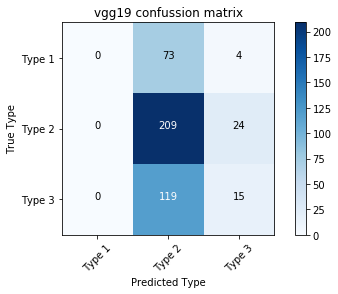

In [29]:
arch = 'vgg19'
input_weights_name = 'vgg19.22.e000-tloss0.9661-vloss0.9677.hdf5'
network = Network(arch,input_weights_name)
network.compile(False)
print("Making ",X.shape[0],"predictions")
predictions = network.predict(X, batch_size = 64)
Y_pred = encoder.inverse_transform(predictions)
plot_confusion_matrix(Y_true, Y_pred, arch)

# Inception (40%) vloss 0.918 kaggle loss 1.21 

Loading weights for inception from ../data/weights/inception.127.e008-tloss0.7832-vloss0.9187.hdf5
Using optimizer: adam
Making  444 predictions


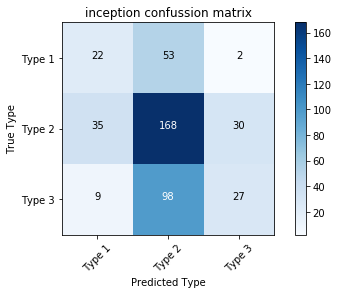

In [30]:
arch = 'inception'
input_weights_name = 'inception.127.e008-tloss0.7832-vloss0.9187.hdf5'
network = Network(arch,input_weights_name)
network.compile(False)
print("Making ",X.shape[0],"predictions")
predictions = network.predict(X, batch_size = 64)
Y_pred = encoder.inverse_transform(predictions)
plot_confusion_matrix(Y_true, Y_pred, arch)


# Xception (90%) vloss 0.884 kaggle loss 1.27

Loading weights for xception from ../data/weights/xception.108.e031-tloss0.7334-vloss0.8837.hdf5
Using optimizer: adam
Making  444 predictions


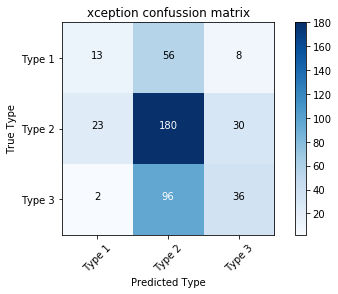

In [31]:
arch = 'xception'
input_weights_name = 'xception.108.e031-tloss0.7334-vloss0.8837.hdf5'
network = Network(arch,input_weights_name)
network.compile(False)
print("Making ",X.shape[0],"predictions")
predictions = network.predict(X, batch_size = 64)
Y_pred = encoder.inverse_transform(predictions)
plot_confusion_matrix(Y_true, Y_pred, arch)


# Inception (90%) vloss 0.909

Loading weights for inception from ../data/weights/inception.282.e020-tloss0.7100-vloss0.9091.hdf5
Using optimizer: adam
Making  444 predictions


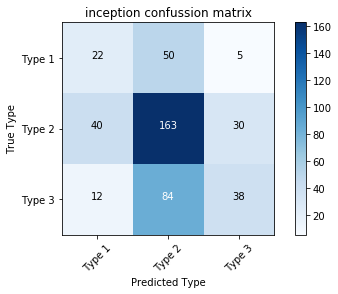

In [32]:
arch = 'inception'
input_weights_name = 'inception.282.e020-tloss0.7100-vloss0.9091.hdf5'
network = Network(arch,input_weights_name)
network.compile(False)
print("Making ",X.shape[0],"predictions")
predictions = network.predict(X, batch_size = 64)
Y_pred = encoder.inverse_transform(predictions)
plot_confusion_matrix(Y_true, Y_pred, arch)
